## 10. Cálculo com funções vetoriais

Aqui vamos tratar de funções que têm como domínio um conjunto de números reais e como imagem um conjunto de vetores. Essas funções são chamadas de funções com valores vetoriais (ou funções vetoriais). O gráfico é uma curva que também pode ser representada por equações paramétricas. O cálculo de funções vetoriais envolve o cálculo de funções com valores reais definidas por suas equações paramétricas correspondentes. As aplicações envolvem Geometria, Física e Engenharia e incluem o comprimento de arco, o vetor tangente e o vetor normal a curvas, e a curvatura. Em Física e Engenharia, os vetores são usados para calcular o trabalho e para discutir o movimento ao longo de uma curva.

### 10.1 Derivadas e Integrais de Funções Vetoriais

**Derivada de função vetorial:** Se $\mathbf{r}(t)=\langle f(t), g(t), h(t)\rangle=f(t) \mathbf{i}+g(t) \mathbf{j}+h(t) \mathbf{k}$, onde $f, g$ e $h$ são funções diferenciáveis, então

$$
\mathbf{r}^{\prime}(t)=\left\langle f^{\prime}(t), g^{\prime}(t), h^{\prime}(t)\right\rangle=f^{\prime}(t) \mathbf{i}+g^{\prime}(t) \mathbf{j}+h^{\prime}(t) \mathbf{k}
$$


O vetor $\mathbf{r}^{\prime}(t)$ é chamado vetor tangente à curva definida por $\mathbf{r}$ para um determinado valor de $t$. Um vetor unitário que tem a mesma direção do vetor tangente, definido por 
$$\mathbf{T}(t)=\frac{\mathbf{r}^{\prime}(t)}{\left|\mathbf{r}^{\prime}(t)\right|}$$ é chamado **vetor tangente unitário**.

**Exemplo 10.1:** ([Stewart, 2016, v 2, p 830](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/309)) Vamos determinar a derivada de $\mathbf{r}(t)=\left(1+t^3\right) \mathbf{i}+t e^{-t} \mathbf{j}+\operatorname{sen} 2 t \mathbf{k}$ e encontrar o vetor tangente unitário no ponto onde $t=0$ usando SymPy. Em seguida, vamos fazer o gráfico da curva e representar alguns vetores tangentes.

In [1]:
import sympy as sp 

In [2]:
# definindo a função vetorial r(t)
t = sp.symbols('t', real = True)
r = sp.Matrix([1+t**3, t*sp.exp(-t), sp.sin(2*t)])
display(r)

Matrix([
[ t**3 + 1],
[t*exp(-t)],
[ sin(2*t)]])

In [3]:
#derivada de r(t)
dr = r.diff(t)
display(dr)

Matrix([
[              3*t**2],
[-t*exp(-t) + exp(-t)],
[          2*cos(2*t)]])

In [4]:
# vetor tangente unitário em t=0 
(dr/dr.norm()).subs(t,0)

Matrix([
[          0],
[  sqrt(5)/5],
[2*sqrt(5)/5]])

Agora vamos representar a curva e alguns vetores tangentes.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

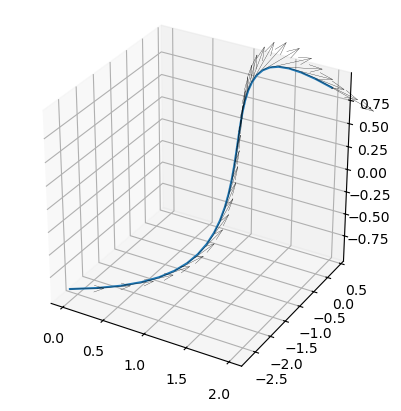

In [6]:
# gráfico
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

t = np.linspace(-1, 1, 30)

x = 1+t**3
y = t*np.exp(-t)
z = np.sin(2*t)
ax.plot(x,y,z)

u = 3*t**2
v = (1-t)*np.exp(-t)
w = 2*np.cos(2*t)
norm = np.sqrt(u**2 + v**2 + w**2)
ax.quiver(x,y,z, u/norm, v/norm, w/norm,
          length=0.5, linewidths= 0.2,
          color = 'black',normalize=True)

ax.set_box_aspect([1,1,1]) # proporção dos eixos
plt.show()

**Integral de um  função vetorial:** A integral definida de uma função vetorial contínua $\mathbf{r}(t)$ pode ser definida da mesma forma que para a função real, exceto que a integral resulta em um vetor

$$
\int_a^b \mathbf{r}(t) d t=\left(\int_a^b f(t) d t\right) \mathbf{i}+\left(\int_a^b g(t) d t\right) \mathbf{j}+\left(\int_a^b h(t) d t\right) \mathbf{k}
$$

**Exemplo 10.2:**  ([Stewart, 2016, v 2, p 833](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/312)) Se $\mathbf{r}(t)=2 \cos t \mathbf{i}+\operatorname{sen} t \mathbf{j}+2 t \boldsymbol{k}$, então

$$
\begin{aligned}
\int \mathbf{r}(t) d t & =\left(\int 2 \cos t d t\right) \mathbf{i}+\left(\int \operatorname{sen} t d t\right) \mathbf{j}+\left(\int 2 t d t\right) \mathbf{k} \\
& =2 \operatorname{sen} t \mathbf{i}-\cos t \mathbf{j}+t^2 \mathbf{k}+\mathbf{C}
\end{aligned}
$$

onde $\mathbf{C}$ é um vetor constante de integração, e

$$
\int_0^{\pi / 2} \mathbf{r}(t) d t=\left[2 \operatorname{sen} t \mathbf{i}-\cos t \mathbf{j}+t^2 \mathbf{k}\right]_0^{\pi / 2}=2 \mathbf{i}+\mathbf{j}+\frac{\pi^2}{4} \mathbf{k}
$$


In [7]:
t = sp.symbols('t', real = True)
r = sp.Matrix([2*sp.cos(t),-sp.sin(t), 2*t])
display(r)

Matrix([
[2*cos(t)],
[ -sin(t)],
[     2*t]])

In [8]:
sp.integrate(r,t)

Matrix([
[2*sin(t)],
[  cos(t)],
[    t**2]])

In [9]:
sp.integrate(r,(t,0,sp.pi/2))

Matrix([
[      2],
[     -1],
[pi**2/4]])

### 10.2 Comprimento de Arco e Curvatura

Suponha que a curva tenha equação vetorial $\mathbf{r}(t)=\langle f(t), g(t), h(t)\rangle, a \leq t \leq$ $b$, ou, o que é equivalente, equações paramétricas $x=f(t), y=g(t), z=h(t)$, onde $f^{\prime}, g^{\prime}$ e $h^{\prime}$ são funções contínuas. Se a curva é percorrida exatamente uma vez à medida que $t$ cresce, a partir de $a$ para $b$, então, o comprimento do arco de curva é dado por

$$
L=\int_a^b\left|\mathbf{r}^{\prime}(t)\right| d t
$$

ou, equivalentemente, no caso espacial, por 

$$
L =\int_a^b \sqrt{\left[f^{\prime}(t)\right]^2+\left[g^{\prime}(t)\right]^2+\left[h^{\prime}(t)\right]^2} d t =\int_a^b \sqrt{\left(\frac{d x}{d t}\right)^2+\left(\frac{d y}{d t}\right)^2+\left(\frac{d z}{d t}\right)^2} d t
$$

**Exemplo 10.3:**  ([Stewart, 2016, v 2, p 836](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/312))   Calcule o comprimento do arco da hélice circular de equação $\mathbf{r}(t)=\cos t \mathbf{i}$ $+\operatorname{sen} t \mathbf{j}+t \mathbf{k}$ do ponto $(1,0,0)$ até o ponto $(1,0,2 \pi)$.

In [10]:
t = sp.symbols('t', real = True)
r = sp.Matrix([sp.cos(t),sp.sin(t), t])
display(r)

Matrix([
[cos(t)],
[sin(t)],
[     t]])

Para obter $\left|\mathbf{r}^{\prime}(t)\right|$ usando SymPy para derivação e produto interno, podemos fazer

In [11]:
dr_mod = sp.sqrt(r.diff(t).dot(r.diff(t)))
display(dr_mod)

sqrt(sin(t)**2 + cos(t)**2 + 1)

Para simplificar considerando as identidades trigonométrica, podemos fazer

In [12]:
sp.simplify(dr_mod, trig=True)

sqrt(2)

Para o cálculo do comprimento de arco em $0  \leq t \leq 2\pi$ usamos a integração definida

In [13]:
sp.integrate(dr_mod, (t,0,2*sp.pi))

2*sqrt(2)*pi

Podemos plotar a curva fazendo

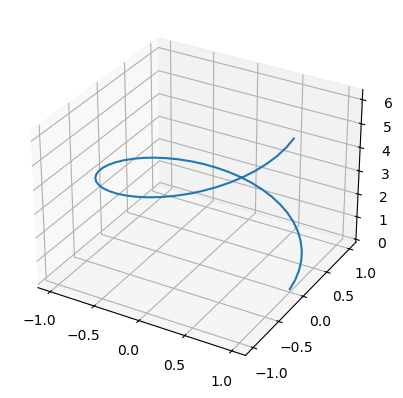

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

t = np.linspace(0, 2*np.pi)
ax.plot(np.cos(t), np.sin(t), t)

plt.show()

**Aproximação numérica:** Observe que podemos obter uma aproximação numérica para o comprimento do arco por uma soma dos comprimentos de segmentos de retas como é mostrado a seguir par o caso de $n=10$
partes. Quanto maior o número de partes, mais preciso será o resultado.

In [15]:
n = 10
t = np.linspace(0, 2*np.pi, n+1)
x = np.cos(t)
y = np.sin(t)
z = t

# soma
np.sum(np.sqrt(np.diff(x)**2+np.diff(y)**2+np.diff(z)**2))

8.81334322089909

In [16]:
# valor exato
2*np.sqrt(2)*np.pi

8.885765876316732

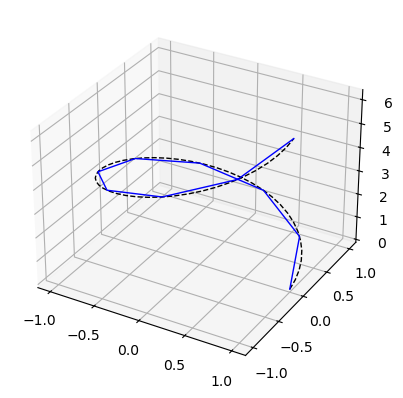

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

t = np.linspace(0, 2*np.pi)
ax.plot(np.cos(t), np.sin(t), t, 'k--', lw=1)

t = np.linspace(0, 2*np.pi, 10)
ax.plot(np.cos(t), np.sin(t), t, 'b', lw=1)

plt.show()

O comprimento de uma curva espacial é o limite dos comprimentos das poligonais inscritas. 

Definimos sua função de comprimento de arco $s$ por

$$
s(t)=\int_a^t\left|\mathbf{r}^{\prime}(u)\right| d u=\int_a^t \sqrt{\left(\frac{d x}{d u}\right)^2+\left(\frac{d y}{d u}\right)^2+\left(\frac{d z}{d u}\right)^2} d u
$$

derivarmos os dois lados tem-se

$$
\frac{d s}{d t}=\left|\mathbf{r}^{\prime}(t)\right.|
$$

É frequentemente útil parametrizar uma curva em relação ao comprimento doarco, pois o comprimento de arco aparece naturalmente a partir da forma da curva e não depende do sistema de coordenadas utilizado ou de uma parametrização específica. 

#### 10.3 Curvatura

A curvatura de $C$ em dado ponto é a medida de quão rapidamente a curva muda de direção no ponto. Especificamente, definimos a curvatura como o módulo da taxa de variação do vetor tangente unitário com relação ao comprimento do arco. A curvatura de uma curva é $\kappa=\left|\frac{d \mathbf{T}}{d s}\right|$
onde $\mathbf{T}$ é o vetor tangente unitário. Como $d s / d t=\left|\mathbf{r}^{\prime}(t)\right|$, então

$$\kappa(t)=\frac{\left|\mathbf{T}^{\prime}(t)\right|}{\left|\mathbf{r}^{\prime}(t)\right|}  \quad \quad \text{ou} \quad \quad \kappa(t)=\frac{\left|\mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t)\right|}{\left|\mathbf{r}^{\prime}(t)\right|^3}$$

**Exemplo 10.4:** ([Stewart, 2016, v2, p 838](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/317)) Determine a curvatura da cúbica retorcida $\mathbf{r}(t)=\left\langle t, t^2, t^3\right\rangle$ em um ponto genérico e em ( $0,0,0$ ).

*Solução:* Calculemos inicialmente os ingredientes necessários:

Derivadas: $\quad \mathbf{r}^{\prime}(t) =\left\langle 1,2 t, 3 t^2\right\rangle \quad{\text{e}}\quad \mathbf{r}^{\prime \prime}(t)=\langle 0,2,6 t\rangle$


In [18]:
t = sp.symbols('t', real = True)
r = sp.Matrix([t,t**2,t**3])
display(r)

Matrix([
[   t],
[t**2],
[t**3]])

In [19]:
# com SymPy
display(r.diff(t), r.diff(t,t))

Matrix([
[     1],
[   2*t],
[3*t**2]])

Matrix([
[  0],
[  2],
[6*t]])

Módulo da derivada primeira: $\quad \left|\mathbf{r}^{\prime}(t)\right| =\sqrt{1+4 t^2+9 t^4} $

In [20]:
# com SymPy
sp.sqrt(r.diff(t).dot(r.diff(t)))

sqrt(9*t**4 + 4*t**2 + 1)

Produto vetorial :
$\quad \mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t) =\left|\begin{array}{rrr}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
1 & 2 t & 3 t^2 \\
0 & 2 & 6 t
\end{array}\right|=6 t^2 \mathbf{i}-6 t \mathbf{j}+2 \mathbf{k}$

In [21]:
r.diff(t).cross(r.diff(t,t)).T

Matrix([[6*t**2, -6*t, 2]])

Em módulo $\left|\mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t)\right| =\sqrt{36 t^4+36 t^2+4}=2 \sqrt{9 t^4+9 t^2+1}$

In [22]:
(r.diff(t).cross(r.diff(t,t))).norm()

sqrt(36*t**4 + 36*t**2 + 4)

Então, 
$$
\kappa(t)=\frac{\left|\mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t)\right|}{\left|\mathbf{r}^{\prime}(t)\right|^3}=\frac{2 \sqrt{1+9 t^2+9 t^4}}{\left(1+4 t^2+9 t^4\right)^{3 / 2}}
$$

In [23]:
k = (r.diff(t).cross(r.diff(t,t))).norm()/(r.diff(t).dot(r.diff(t)))**(sp.Rational(2,3))
display(k)

sqrt(36*t**4 + 36*t**2 + 4)/(9*t**4 + 4*t**2 + 1)**(2/3)

Na origem, onde $t=0$, a curvatura é $\kappa(0)=2$.

In [24]:
k.subs(t,0)

2

### 10.4 Vetores Normal e Binormal

Em qualquer ponto onde $\kappa \neq 0$ podemos definir o vetor **normal unitário principal** $\mathbf{N}(t)$ (ou simplesmente normal unitário) como

$$
\mathbf{N}(t)=\frac{\mathbf{T}^{\prime}(t)}{\left|\mathbf{T}^{\prime}(t)\right|}
$$


Podemos pensar no vetor normal unitário como uma indicação da direção na qual a curva está virando em cada ponto. O vetor

$$
\mathbf{B}(t)=\mathbf{T}(t) \times \mathbf{N}(t)
$$

é chamado **vetor binormal**. Ele é perpendicular a ambos $\mathbf{T}$ e $\mathbf{N}$ e também é unitário.

**Exemplo 10.5:** Determine os vetores normal e binormal da hélice circular

$$
\mathbf{r}(t)=\cos t \mathbf{i}+\operatorname{sen} t \mathbf{j}+t \mathbf{k}
$$


*Solução:* Vamos, inicialmente, calcular os ingredientes necessários para o cálculo do vetor normal unitário:

$$
\mathbf{r}^{\prime}(t)=-\operatorname{sen} t \mathbf{i}+\cos t \mathbf{j}+\mathbf{k} \quad\left|\mathbf{r}^{\prime}(t)\right|=\sqrt{2}
$$

$$
\begin{aligned}
& \mathbf{T}(t)=\frac{\mathbf{r}^{\prime}(t)}{\left|\mathbf{r}^{\prime}(t)\right|}=\frac{1}{\sqrt{2}}(-\operatorname{sen} t \mathbf{i}+\cos t \mathbf{j}+\mathbf{k}) \\
& \mathbf{T}^{\prime}(t)=\frac{1}{\sqrt{2}}(-\cos t \mathbf{i}-\operatorname{sen} t \mathbf{j}) \quad\left|\mathbf{T}^{\prime}(t)\right|=\frac{1}{\sqrt{2}} \\
& \mathbf{N}(t)=\frac{\mathbf{T}^{\prime}(t)}{\left|\mathbf{T}^{\prime}(t)\right|}=-\cos t \mathbf{i}-\operatorname{sen} t \mathbf{j}=\langle-\cos t,-\operatorname{sen} t, 0\rangle
\end{aligned}
$$


Isso mostra que o vetor normal em um ponto da hélice circular é horizontal e aponta em direção ao eixo $z$. O vetor binormal é

$$
\mathbf{B}(t)=\mathbf{T}(t) \times \mathbf{N}(t)=\frac{1}{\sqrt{2}}\left[\begin{array}{ccc}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
-\operatorname{sen} t & \cos t & 1 \\
-\cos t & -\operatorname{sen} t & 0
\end{array}\right]=\frac{1}{\sqrt{2}}\langle\operatorname{sen} t,-\cos t, 1\rangle
$$

Aqui vai o passo a passo em `SymPy`:

In [25]:
# A função r(t)
t = sp.symbols('t', real = True)
r = sp.Matrix([sp.cos(t),sp.sin(t), t])
display(r)

Matrix([
[cos(t)],
[sin(t)],
[     t]])

In [26]:
# A derivada r'(t)
dr = r.diff(t)
display(dr)

Matrix([
[-sin(t)],
[ cos(t)],
[      1]])

In [27]:
# O vetor tangente unitário T
T = sp.simplify(dr/dr.norm(), trig=True)
display(T)

Matrix([
[-sqrt(2)*sin(t)/2],
[ sqrt(2)*cos(t)/2],
[        sqrt(2)/2]])

In [28]:
# A derivada T'(t)
dT  = T.diff(t)
display(dT)

Matrix([
[-sqrt(2)*cos(t)/2],
[-sqrt(2)*sin(t)/2],
[                0]])

In [29]:
# O vetor normal N 
N = sp.simplify(dT/dT.norm(), trig=True)
display(N)

Matrix([
[-cos(t)],
[-sin(t)],
[      0]])

In [30]:
# O vetor binormal B
B = sp.simplify(T.cross(N), trig=True)
display(B)

Matrix([
[ sqrt(2)*sin(t)/2],
[-sqrt(2)*cos(t)/2],
[        sqrt(2)/2]])

#### 10.6 Torção

Intuitivamente, a torção $\tau$ em um ponto $P$ de uma curva é uma medida do quanto a curva é "torcida" em $P$. 

A torção de uma curva é dada por

$$
\tau(t)=-\frac{\mathbf{B}^{\prime}(t) \cdot \mathbf{N}(t)}{\left|\mathbf{r}^{\prime}(t)\right|}
$$

**Exemplo 10.6:** Determine a torção da hélice $\mathbf{r}(t)=\langle\cos t, \operatorname{sen} t, t\rangle$.

In [31]:
# aproveitando o exemplo anterior
tau = -B.diff(t).dot(N)/dr.norm()
display(tau)
tau = sp.simplify(tau, trig=True)
display(tau)

(sqrt(2)*sin(t)**2/2 + sqrt(2)*cos(t)**2/2)/sqrt(sin(t)**2 + cos(t)**2 + 1)

1/2

A torção da curva descrita pela função vetorial $\mathbf{r}$ também é dada ela expressão equivalente:

$$
\tau(t)=\frac{\left[\mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t)\right] \cdot \mathbf{r}^{\prime \prime \prime}(t)}{\left|\mathbf{r}^{\prime}(t) \times \mathbf{r}^{\prime \prime}(t)\right|^2}
$$


### 10.7 Integrais de Linha no Espaço

Suponhamos agora que $C$ seja uma curva espacial suave dada pelas equações paramétricas

$$
x=x(t) \quad y=y(t) \quad z=z(t) \quad a \leq t \leq b
$$

ou por uma equação vetorial $\mathbf{r}(t)=x(t) \mathbf{i}+y(t) \mathbf{j}+z(t) \mathbf{k}$. Se $f$ é uma função de três variáveis que é contínua em alguma região contendo $C$, então a integral de linha de $\boldsymbol{f}$ ao longo de $\boldsymbol{C}$ é dada por:

$$
\int_C f(x, y, z) d s=\int_a^b f(x(t), y(t), z(t)) \sqrt{\left(\frac{d x}{d t}\right)^2+\left(\frac{d y}{d t}\right)^2+\left(\frac{d z}{d t}\right)^2} d t
$$

ou, usando notação vetorial:

$$
\int_a^b f(\mathbf{r}(t))\left|\mathbf{r}^{\prime}(t)\right| d t
$$

**Exemplo 10.7:** Calcule $\int_C y$ sen $z d s$, onde $C$ é a hélice circular dada pelas equações $x=$ $\cos t, y=\operatorname{sen} t, z=t, 0 \leq t \leq 2 \pi$. 

*Solução:*

$$
\begin{aligned}
\int_C y \operatorname{sen} z d s & =\int_0^{2 \pi}(\operatorname{sen} t) \operatorname{sen} t \sqrt{\left(\frac{d x}{d t}\right)^2+\left(\frac{d y}{d t}\right)^2+\left(\frac{d z}{d t}\right)^2} d t \\
& =\int_0^{2 \pi} \operatorname{sen}^2 t \sqrt{\operatorname{sen}^2 t+\cos ^2 t+1} d t=\sqrt{2} \int_0^{2 \pi} \frac{1}{2}(1-\cos 2 t) d t \\
& =\frac{\sqrt{2}}{2}\left[t-\frac{1}{2} \operatorname{sen} 2 t\right]_0^{2 \pi}=\sqrt{2} \pi
\end{aligned}
$$

Ou computacionalmente:

In [50]:
t = sp.symbols('t', real = True)
r = sp.Matrix([sp.cos(t),sp.sin(t), t])
display(r)

Matrix([
[cos(t)],
[sin(t)],
[     t]])

In [51]:
def f(r):
    return r[1]*sp.sin(r[2])

In [52]:
integrando = sp.simplify(f(r)*r.diff(t).norm(), trig=True)
integrando

sqrt(2)*sin(t)**2

In [53]:
sp.integrate(integrando,(t,0,2*sp.pi))

sqrt(2)*pi

### 10.8 Integrais de Linha de Campos Vetoriais; Trabalho 

Seja $\mathbf{F}$ um campo vetorial contínuo definido sobre uma curva suave $C$ dada pela função vetorial $\mathbf{r}(t), a \leq t \leq b$. Então, a integral de linha de $\mathbf{F}$ ao longo de $C$ é

$$
\int_C \mathbf{F} \cdot d \mathbf{r}=\int_a^b \mathbf{F}(\mathbf{r}(t)) \cdot \mathbf{r}^{\prime}(t) d t=\int_C \mathbf{F} \cdot \mathbf{T} d s
$$


**Exemplo 10.8:** Determine o trabalho feito pelo campo de força $\mathbf{F}(x, y)=x^2 \mathbf{i}-x y \mathbf{j}$ ao se mover uma partícula ao longo de um quarto de círculo $\mathbf{r}(t)=\cos t \mathbf{i}+\operatorname{sen} t \mathbf{j}, 0 \leq t \leq \pi / 2$.

*Solução:* Uma vez que $x=\cos t$ e $y=\operatorname{sen} t$, temos

$$\mathbf{F}(\mathbf{r}(t)) =\cos ^2 t \mathbf{i}-\cos t \operatorname{sen} t \mathbf{j}$$
e
$$\mathbf{r}(t) =-\operatorname{sen} t \mathbf{i}+\cos t \mathbf{j}$$


Portanto, o trabalho realizado é

$$
\begin{aligned}
\int_C \mathbf{F} \cdot d \mathbf{r} & =\int_0^{\pi / 2} \mathbf{F}(\mathbf{r}(t)) \cdot \mathbf{r}^{\prime}(t) d t=\int_0^{\pi / 2}\left(-\cos ^2 t \operatorname{sen} t-\cos ^2 t \operatorname{sen} t\right) d t \\
& \left.=\int_0^{\pi / 2}\left(-2 \cos ^2 t \operatorname{sen} t\right) d t=2 \frac{\cos ^3 t}{3}\right]_0^{\pi / 2}=-\frac{2}{3}
\end{aligned}
$$

Ou computacionalmente:

In [62]:
t = sp.symbols('t', real = True)
r = sp.Matrix([sp.cos(t),sp.sin(t)])
display(r)

Matrix([
[cos(t)],
[sin(t)]])

In [69]:
def F(r):
    return sp.Matrix([r[0]**2,-r[0]*r[1]])

In [70]:
F(r)

Matrix([
[     cos(t)**2],
[-sin(t)*cos(t)]])

In [73]:
sp.integrate(F(r).dot(r.diff(t)),(t,0,sp.pi/2))

-2/3

In [32]:
# Função para calcular o vetor tangente unitário
def vetor_tangente_unitario(r, t):
    r_prime = r.diff(t)
    norm_r_prime = sp.sqrt(sum([comp**2 for comp in r_prime]))
    T = r_prime / norm_r_prime
    return sp.simplify(T)

# Função para calcular o vetor normal principal
def vetor_normal_principal(r, t):
    T = vetor_tangente_unitario(r, t)
    T_prime = T.diff(t)
    norm_T_prime = sp.sqrt(sum([comp**2 for comp in T_prime]))
    N = T_prime / norm_T_prime
    return sp.simplify(N)

# Função para calcular a curvatura
def curvatura(r, t):
    r_prime = r.diff(t)
    r_second = r.diff(t, 2)
    numerador = sp.sqrt(sum([(r_prime.cross(r_second))[i]**2 for i in range(3)]))
    denominador = (sum([comp**2 for comp in r_prime]))**(3/2)
    kappa = numerador / denominador
    return sp.simplify(kappa)

# Função para o vetor binormal (opcional)
def vetor_binormal(r, t):
    T = vetor_tangente_unitario(r, t)
    N = vetor_normal_principal(r, t)
    B = T.cross(N)
    return sp.simplify(B)

# Função para a torção
def torsao(r, t):
    r_prime = r.diff(t)
    r_second = r.diff(t, 2)
    r_third = r.diff(t, 3)
    cross = r_prime.cross(r_second)
    numerador = cross.dot(r_third)
    denominador = sum([comp**2 for comp in cross])
    tau = numerador / denominador
    return sp.simplify(tau)

### Exercícios:

**1.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/312)) Plote o gráfico da curva plana com a equação vetorial dada, encontre $\mathbf{r}^{\prime}(t)$ e o vetor posição $\mathbf{r}(t)$ juntamente com o vetor tangente $\mathbf{r}^{\prime}(t)$ para o valor dado de $t$ dado.

a) $\mathbf{r}(t)=\left\langle t-2, t^2+1\right\rangle, \quad t=-1$  
b) $\mathbf{r}(t)=\left\langle t^2, t^3\right\rangle, \quad t=1$  
c) $\mathbf{r}(t)=e^{2 t} \mathbf{i}+e^t \mathbf{j}, \quad t=0$  
d) $\mathbf{r}(t)=e^t \mathbf{i}+2 t \mathbf{j}, \quad t=0$  
e) $\mathbf{r}(t)=4 \operatorname{sen} t \mathbf{i}-2 \cos t \mathbf{j}, \quad t=3 \pi / 4$  
f) $\mathbf{r}(t)=(\cos t+1) \mathbf{i}+(\operatorname{sen} t-1) \mathbf{j}, \quad t=-\pi / 3$  
g) $\mathbf{r}(t)=\left\langle t^2-2 t, 1+3 t, \frac{1}{3} t^3+\frac{1}{2} t^2\right\rangle, \quad t=2$  
h) $\mathbf{r}(t)=\left\langle\operatorname{tg}^{-1} t, 2 e^{2 t}, 8 t e^t\right\rangle, \quad t=0$  
i) $\mathbf{r}(t)=\cos t \mathbf{i}+3 t \mathbf{j}+2 \operatorname{sen} 2 t \mathbf{k}, \quad t=0$  
j) $\mathbf{r}(t)=\operatorname{sen}^2 t \mathbf{i}+\cos ^2 t \mathbf{j}+\operatorname{tg}^2 t \mathbf{k}, \quad t=\pi / 4$


**2.** Determine as equações paramétricas para a reta tangente à curva dada pelas equações paramétricas, no ponto especificado. Ilustre plotando o gráfico da curva e da reta tangente.

a) $x=t, y=e^{-t}, z=2 t-t^2 ; \quad(0,1,0)$  
b) $x=2 \cos t, y=2 \operatorname{sen} t, z=4 \cos 2 t ; \quad(\sqrt{3}, 1,2)$  
c) $x=t \cos t, y=t, z=t \operatorname{sen} t ; \quad(-\pi, \pi, 0)$  

**3.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/313)) Calcule a integral.

a) $\int_0^2\left(t \mathbf{i}-t^3 \mathbf{j}+3 t^5 \mathbf{k}\right) d t$  
b) $\int_1^4\left(2 t^{3 / 2} \mathbf{i}+(t+1) \sqrt{t} \mathbf{k}\right) d t$  
c) $\int_0^1\left(\frac{1}{t+1} \mathbf{i}+\frac{1}{t^2+1} \mathbf{j}+\frac{t}{t^2+1} \mathbf{k}\right) d t$  
d) $\int_0^{\pi / 4}\left(\sec t \operatorname{tg} t \mathbf{i}+t \cos 2 t \mathbf{j}+\operatorname{sen}^2 2 t \cos 2 t \mathbf{k}\right) d t$  
e) $\int\left(\frac{1}{1+t^2} \mathbf{i}+t e^{t^2} \mathbf{j}+\sqrt{t} \mathbf{k}\right) d t$  
f) $\int\left(t \cos t^2 \mathbf{i}+\frac{1}{t} \mathbf{j}+\sec ^2 t \mathbf{k}\right) d t$  

**4.** Determine $\mathbf{r}(t)$ supondo que $\mathbf{r}^{\prime}(t)=2 t \mathbf{i}+3 t^2 \mathbf{j}+\sqrt{t} \mathbf{k}$ e $\mathbf{r}(1)=\mathbf{i}+\mathbf{j}$.

**5.** Determine $\mathbf{r}(t)$ supondo que $\mathbf{r}^{\prime}(t)=t \mathbf{i}+e^t \mathbf{j}+t e^t \mathbf{k}$ e $\mathbf{r}(0)=\mathbf{i}+\mathbf{j}+\mathbf{k}$.

**6.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/322)) Determine o comprimento da curva.

a) $\mathbf{r}(t)=\langle t, 3 \cos t, 3 \operatorname{sen} t\rangle, \quad-5 \leq t \leq 5$  
b) $\mathbf{r}(t)=\left\langle 2 t, t^2, \frac{1}{3} t^3\right\rangle, \quad 0 \leq t \leq 1$  
c) $\mathbf{r}(t)=\sqrt{2} t \mathbf{i}+e^t \mathbf{j}+e^{-t} \mathbf{k}, \quad 0 \leq t \leq 1$  
d) $\mathbf{r}(t)=\cos t \mathbf{i}+\operatorname{sen} t \mathbf{j}+\ln \cos t \mathbf{k}, \quad 0 \leq t \leq \pi / 4$  
e) $\mathbf{r}(t)=\mathbf{i}+t^2 \mathbf{j}+t^3 \mathbf{k}, \quad 0 \leq t \leq 1$  
f) $\mathbf{r}(t)=t^2 \mathbf{i}+9 t \mathbf{j}+4 t^{3 / 2} \mathbf{k}, \quad 1 \leq t \leq 4$  


**7.** Determine os vetores tangente e normal unitários $\mathbf{T}(t)$ e $\mathbf{N}(t)$. Então encontre a curvatura $\kappa (t)$.

a) $\mathbf{r}(t)=\left\langle t^2, \operatorname{sen} t-t \cos t, \cos t+t \operatorname{sen} t\right\rangle, \quad t>0$  
b) $\mathbf{r}(t)=\langle 5 \operatorname{sen} t, t, 5 \cos t\rangle$  
c) $\mathbf{r}(t)=\left\langle t, t^2, 4\right\rangle$  
d) $\mathbf{r}(t)=\left\langle t, t, \frac{1}{2} t^2\right\rangle$  
e) $\mathbf{r}(t)=\left\langle t, \frac{1}{2} t^2, t^2\right\rangle$  
f) $\mathbf{r}(t)=\left\langle\sqrt{2} t, e^t, e^{-t}\right\rangle$  

**8.** (a) Desenhe a curva $\mathbf{r}(t)=\langle\operatorname{sen} 3 t, \operatorname{sen} 2 t, \operatorname{sen} 3 t\rangle$. Em quantos pontos da curva tem-se a impressão de que a curvatura possui um máximo local ou absoluto?
(b) Use um computador para determinar e fazer o gráfico da função curvatura. Esse gráfico confirma sua conclusão na parte (a)?

**9.** Encontre os vetores $\mathbf{T}$, $\mathbf{N}$ e $\mathbf{B}$ no ponto indicado. 

a) $\mathbf{r}(t)=\left\langle t^2, \frac{2}{3} t^3, t\right\rangle \quad\left(1, \frac{2}{3}, 1\right)$  
b) $\mathbf{r}(t)=\langle\cos t, \operatorname{sen} t, \ln \cos t\rangle, \quad(1,0,0)$  

**10.** Determine a torção da curva fornecida em um ponto genérico, bem como no ponto correspondente a $t=0$.

a) $\mathbf{r}(t)=\left\langle t, \frac{1}{2} t^2, \frac{1}{3} t^3\right\rangle$  
b) $\mathbf{r}(t)=\left\langle e^t, e^{-t}, t\right\rangle$  
c) $\mathbf{r}(t)=\langle\cos t, \operatorname{sen} t, \operatorname{sen} t\rangle$  

**11.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/534)) Calcule a integral de linha, em que $C$ é a curva plana fornecida.

a) $\int_C y d s$, $C: x=t^2, y=2 t, \quad 0 \leq t \leq 3$  
b) $\int_C(x / y) d s$, $C: x=t^3, y=t^4$, $1 \leq t \leq 2$  
c) $\int_C x y^4 d s, \quad C$ é a metade direita do círculo $x^2+y^2=16$  
d) $\int_C x e^y d s, \quad C$ é o segmento de reta de $(2,0)$ a $(5,4)$  
e) $\int_C\left(x^2 y+\operatorname{sen} x\right) d y$, $C$ é o arco da parábola $y=x^2$ de $(0,0)$ a $\left(\pi, \pi^2\right)$  
f) $\int_C e^x d x$, $C$ é o arco da curva $x=y^3$ de $(-1,-1)$ a $(1,1)$  

**12.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/534)) Calcule a integral de linha $\int_C \mathbf{F} \cdot d \mathbf{r}$, onde $C$ é dada pela função vetorial $\mathbf{r}(t)$.

a) $\mathbf{F}(x, y)=x y^2 \mathbf{i}-x^2 \mathbf{j}$, $\quad \mathbf{r}(t)=t^3 \mathbf{i}+t^2 \mathbf{j}$, $\quad 0 \leq t \leq 1$

b) $\mathbf{F}(x, y, z)=\left(x+y^2\right) \mathbf{i}+x z \mathbf{j}+(y+z) \mathbf{k}$, $\quad \mathbf{r}(t)=t^2 \mathbf{i}+t^3 \mathbf{j}-2 t \mathbf{k}$, $\quad 0 \leq t \leq 2$

c) $\mathbf{F}(x, y, z)=\operatorname{sen} x \mathbf{i}+\cos y \mathbf{j}+x z \mathbf{k}$, $\quad \mathbf{r}(t)=t^3 \mathbf{i}-t^2 \mathbf{j}+t \mathbf{k}$, $\quad 0 \leq t \leq 1$

d) $\mathbf{F}(x, y, z)=x y \mathbf{i}+z^3 \mathbf{j}+y \mathbf{k}$, 
$\quad \mathbf{r}(t)=e^t \mathbf{i}+e^{2 t} \mathbf{j}+e^{-t} \mathbf{k}$, $\quad-1 \leq t \leq 1$

